## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Обзор данных

#### Чтение датасета

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head(2)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad


#### Датасет содержит следующие поля

- `Unnamed: 0` - колонка с номером фильма
- `Film` - название фильма
- `Oscar Year` - год получения премии "Оскар"
- `Film Studio/Producer(s)` - студия или продюссерский состав
- `Award` - номинация
- `Year of Release` - год выхода
- `Movie Time` - длительность фильма
- `Movie Genre` - жанр фильма
- `IMDB Rating` - рейтинг на сервисе IMDB
- `IMDB Votes` - количество голосов за фильм на сервисе IMDB
- `Movie Info` - описание фильма
- `Genres` - жанр фильма
- `Critic Consensus` - критика
- `Content Rating` - рейтинг контента
- `Directors` - режиссёры
- `Authors` - авторы сценария
- `Actors` - актёрский состав
- `Original Release Date` - официальная дата выхода фильма
- `Streaming Release Date` - дата выхода на стриминговых платформах
- `Production Company` - площадка выхода
- `Tomatometer Status` - tomatometer статус
- `Tomatometer Rating` - tomatometer рейтинг
- `Tomatometer Count` - счётчик tomatometer 
- `Audience Status` - мнение аудитории
- `Audience Rating` - рейтинг аудитории
- `Audience Count` - количество аудитории
- `Tomatometer Top Critics Count` - top уровень tomatometer рекомендации
- `Tomatometer Fresh Critics Count` - fresh уровень tomatometer рекомендации
- `Tomatometer Rotten Critics Count` - rotten уровень tomatometer рекомендации
- `Film ID` - идентификатор фильма

#### Получение информации о данных в столбцах датафрейма

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

#### Выводы

- Заголовки нужно привести к lower case и заменить разделяющие пробелы на знаки нижнего подчёркивания
- Столбец `Unnamed: 0` требуется удалить
- Столбцы `Movie Genre` и `Genres` нужно объединить
- Данные в столбцах`Year of Release`, `Original Release Date`, `Streaming Release Date` нужно привести к типу даты
- Требуется обработка пропущенных значений
- Требуется обработка дубликатов

## Предварительная обработка данных

#### Форматирование заголовков датафрейма

In [5]:
df.columns = [column.strip().lower().replace(" ", "_").replace("/", "_or_").replace("(s)", "") for column in df.columns]

In [6]:
df.columns

Index(['unnamed:_0', 'film', 'oscar_year', 'film_studio_or_producer', 'award',
       'year_of_release', 'movie_time', 'movie_genre', 'imdb_rating',
       'imdb_votes', 'movie_info', 'genres', 'critic_consensus',
       'content_rating', 'directors', 'authors', 'actors',
       'original_release_date', 'streaming_release_date', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'film_id'],
      dtype='object')

#### Удаление первого столбца из датафрейма

In [7]:
df = df.drop(columns=df.columns[0])

#### Объединение столбцов `movie_genre` и `genres`

In [8]:
df["genre"] = df["genres"] + " " + df["movie_genre"]

In [9]:
df.drop("genres", axis=1, inplace=True)
df.drop("movie_genre", axis=1, inplace=True)

In [10]:
df["genre"]

0         Action & Adventure, Classics Drama,Romance,War
1                                                    NaN
2                                                    NaN
3      Musical & Performing Arts, Romance Drama,Music...
4                                                    NaN
                             ...                        
566                                                  NaN
567                                                  NaN
568                                                  NaN
569                                                  NaN
570                                                  NaN
Name: genre, Length: 571, dtype: object

#### Обработка столбцов с датами

Так как данные о годах получения премии "Оскар" не являются чем-то важным, можно оставить только один год

In [11]:
df["oscar_year"] = df["oscar_year"].apply(lambda year: year[:year.find("/")] if year.find("/") != -1 else year)

In [12]:
df["oscar_year"] = df["oscar_year"].apply(lambda year: str(year) + "-01-01")

In [13]:
df["oscar_year"] = pd.to_datetime(df["oscar_year"], format="%Y-%m-%d")
df["original_release_date"] = pd.to_datetime(df["oscar_year"], format="%Y-%m-%d")
df["streaming_release_date"] = pd.to_datetime(df["oscar_year"], format="%Y-%m-%d")

#### Обработка пропущенных значений

Проверка на наличие пропущенных значений

In [14]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

critic_consensus                    40.630473
audience_status                     23.642732
authors                             23.467601
directors                           23.467601
movie_info                          23.292469
content_rating                      23.117338
production_company                  23.117338
tomatometer_count                   23.117338
actors                              23.117338
genre                               23.117338
tomatometer_rating                  23.117338
audience_rating                     23.117338
audience_count                      23.117338
tomatometer_top_critics_count       23.117338
tomatometer_fresh_critics_count     23.117338
tomatometer_rotten_critics_count    23.117338
tomatometer_status                  23.117338
film_id                              0.000000
film                                 0.000000
streaming_release_date               0.000000
oscar_year                           0.000000
imdb_votes                        

Недостающие значения найдены в столбцах: `critic_consensus`, `audience_status`, `authors`, `directors`, `movie_info`, `content_rating`, `production_company`, `tomatometer_count`, `actors`, `genre`, `tomatometer_rating`, `audience_rating`, `audience_count`, `tomatometer_top_critics_count`, `tomatometer_fresh_critics_count`, `tomatometer_rotten_critics_count`, `tomatometer_status`

Предположения для заполнения пропущенных значений:

- `critic_consensus` - unknown
- `audience_status` - unknown
- `authors` - unknown
- `directors` - unknown
- `movie_info` - unknown
- `content_rating` - 0.0
- `production_company` - unknown
- `tomatometer_count` - 0.0
- `actors` - unknown
- `genre` - unknown
- `tomatometer_rating` - 0.0
- `audience_rating` - 0.0
- `audience_count` - 0.0
- `tomatometer_top_critics_count` - 0.0
- `tomatometer_fresh_critics_count` - 0.0
- `tomatometer_rotten_critics_count` - 0.0
- `tomatometer_status` - unknown

In [15]:
df["critic_consensus"].fillna("unknown", inplace=True)
df["audience_status"].fillna("unknown", inplace=True)
df["authors"].fillna("unknown", inplace=True)
df["directors"].fillna("unknown", inplace=True)
df["movie_info"].fillna("unknown", inplace=True)
df["content_rating"].fillna(0.0, inplace=True)
df["production_company"].fillna("unknown", inplace=True)
df["tomatometer_count"].fillna(0.0, inplace=True)
df["actors"].fillna("unknown", inplace=True)
df["genre"].fillna("unknown", inplace=True)
df["tomatometer_rating"].fillna(0.0, inplace=True)
df["audience_rating"].fillna(0.0, inplace=True)
df["audience_count"].fillna(0.0, inplace=True)
df["tomatometer_top_critics_count"].fillna(0.0, inplace=True)
df["tomatometer_fresh_critics_count"].fillna(0.0, inplace=True)
df["tomatometer_rotten_critics_count"].fillna(0.0, inplace=True)
df["tomatometer_status"].fillna("unknown", inplace=True)

Проверка правильности решения

In [16]:
df.isna().sum()

film                                0
oscar_year                          0
film_studio_or_producer             0
award                               0
year_of_release                     0
movie_time                          0
imdb_rating                         0
imdb_votes                          0
movie_info                          0
critic_consensus                    0
content_rating                      0
directors                           0
authors                             0
actors                              0
original_release_date               0
streaming_release_date              0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
film_id     

#### Обработка дубликатов

In [17]:
df.duplicated().sum()

0

Дубликатов нет, поэтому обрабатывать их не нужно.

## EDA

#### Описательная статистика датафрейма

In [18]:
df.describe()

,year_of_release,movie_time,imdb_rating,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571.000000,571.000000,571.000000
mean,1973.357268,124.894921,7.570403,67.274956,85.106830,63.373030,3.962644e+05,16.807356,75.707531,9.437828
std,29.315738,26.322817,0.559652,38.318101,114.728256,36.075884,3.183439e+06,21.074089,103.227361,17.702044
min,1927.000000,66.000000,5.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1944.000000,107.000000,7.300000,57.500000,7.000000,53.000000,4.830000e+02,0.000000,6.000000,0.000000
50%,1972.000000,121.000000,7.600000,87.000000,37.000000,81.000000,1.100100e+04,7.000000,32.000000,3.000000
75%,2001.000000,136.500000,7.900000,94.000000,95.500000,88.000000,7.009000e+04,26.000000,88.000000,10.500000
max,2021.000000,238.000000,9.300000,100.000000,574.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000


#### Тепловая карта корреляций

<Axes: >

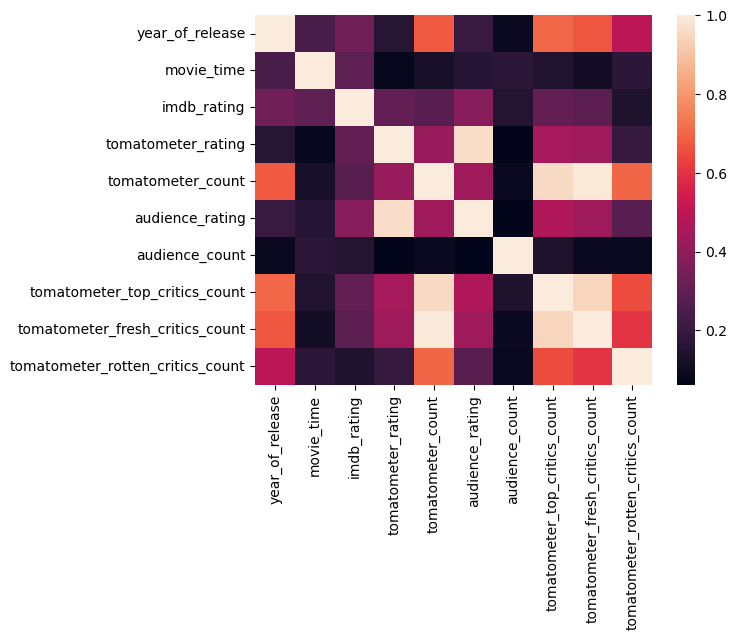

In [19]:
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr())

На графике видно, что `tomatometer_fresh_critics_count`, `tomatometer_top_critics_count` и `tomatometer_count` сильно коррелируют. Оно и не удивительно - скорее всего, `tomatometer_fresh_critics_count` и `tomatometer_top_critics_count` являются лишь степенью параметра `tomatometer_count`.

Помимо этого коррелируют `tomatometer_count` и `year_of_release`. Это, возможно, говорит о том, что фильмы, выпущенные в определённый период времени, считались и считаются качественными и проработанными, а поэтому высоко оцениваются пользователями сервиса IMDB.

#### Гистограммы по данным

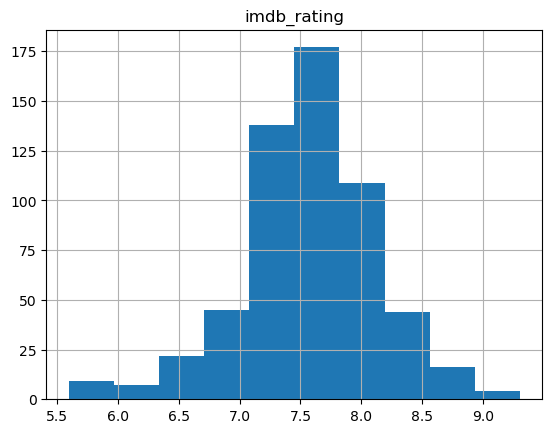

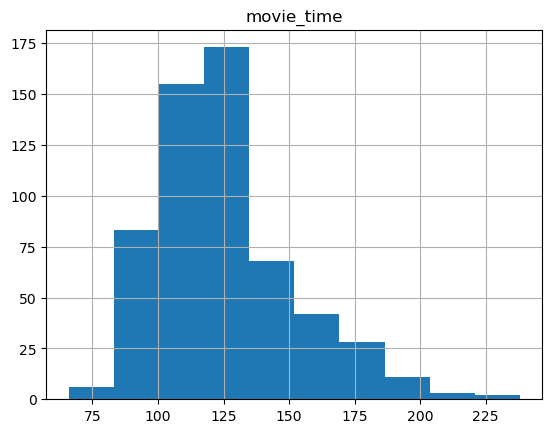

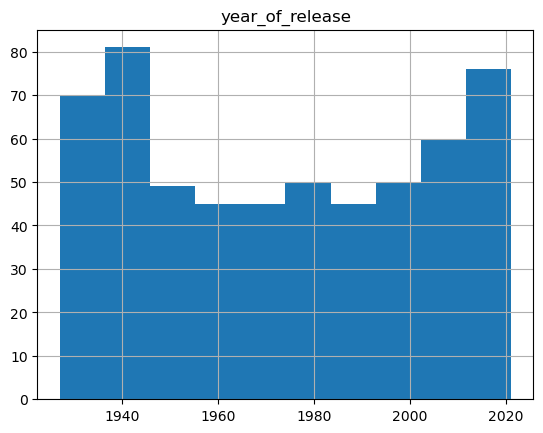

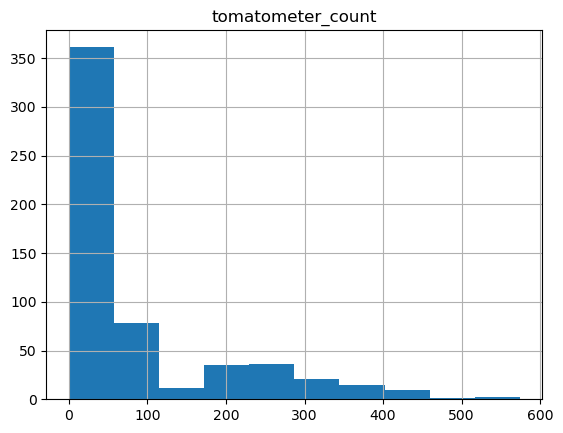

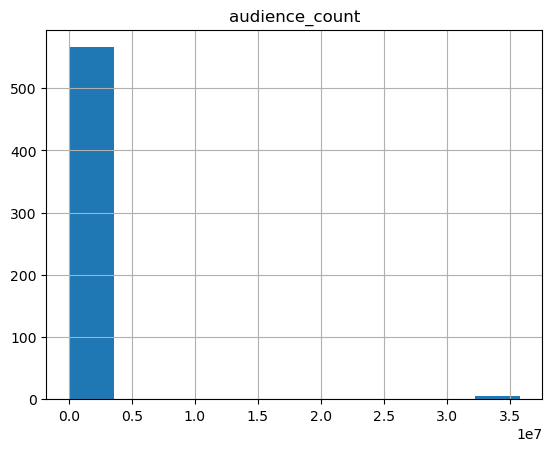

In [20]:
columns = ["imdb_rating", "movie_time", "year_of_release", "tomatometer_count", "audience_count"]

for column in columns:
    df.hist(column)

На графиках выше видно, что данныев в гистограммах `tomatometer_count`, `audience_count` данные сильно смещены влево. Нужно устранить выбросы.

#### Устранение выбросов

In [21]:
outliers = df[["tomatometer_count", "audience_count"]]

In [22]:
q1 = outliers.quantile(0.25)
q3 = outliers.quantile(0.75)

iqr = q3 - q1

filtered_df = outliers[~((outliers < (q1 - 1.5 * iqr)) | (outliers > (q3 + 1.5 * iqr))).any(axis=1)]

In [23]:
index_list = list(filtered_df.index.values)
filtered_df = df[df.index.isin(index_list)]

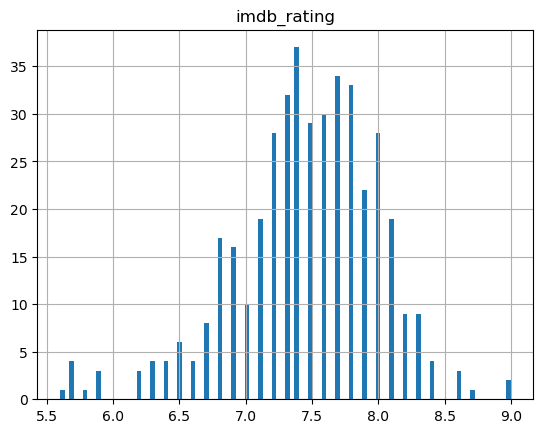

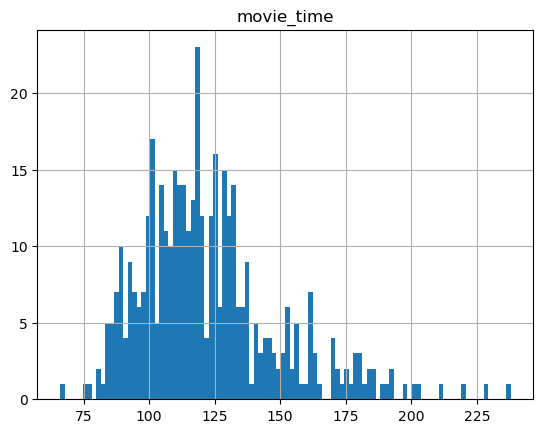

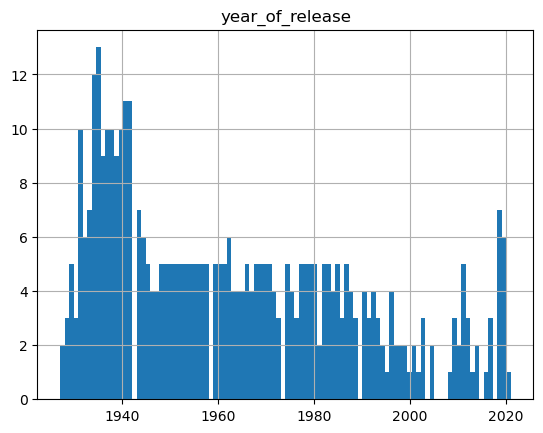

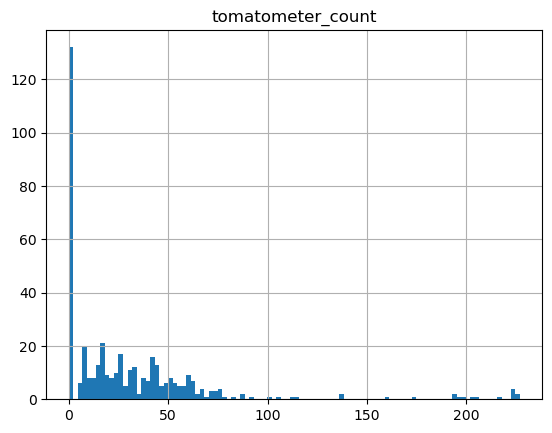

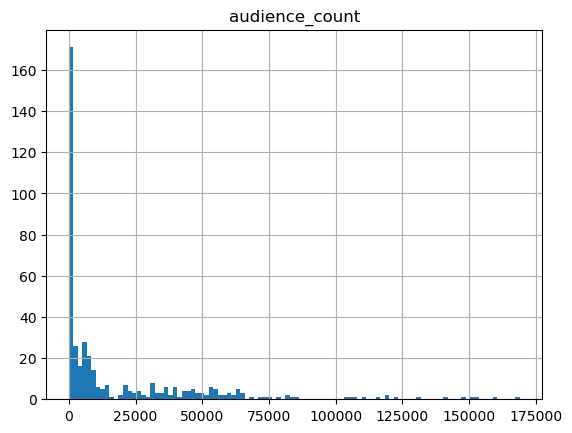

In [24]:
for column in columns:
    filtered_df.hist(column, bins=100)

#### Зависимость между рейтингом фильма и его оценками

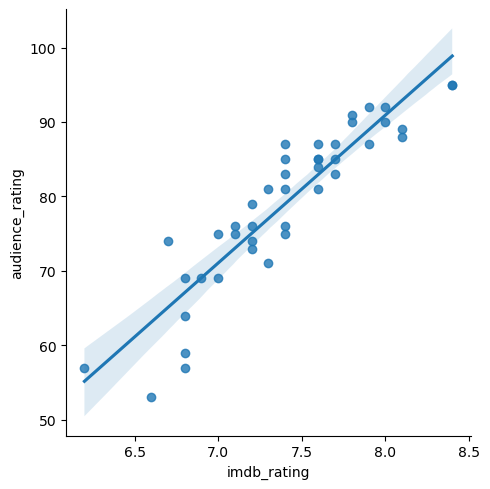

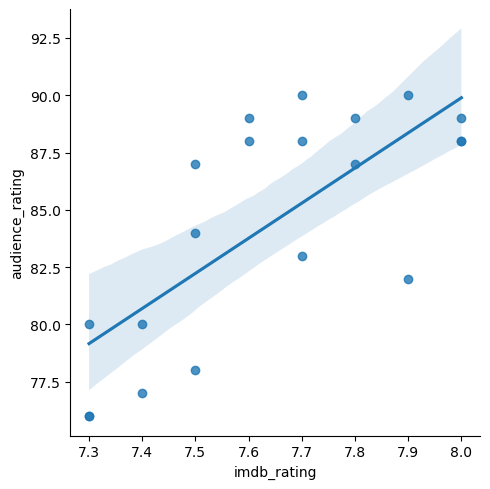

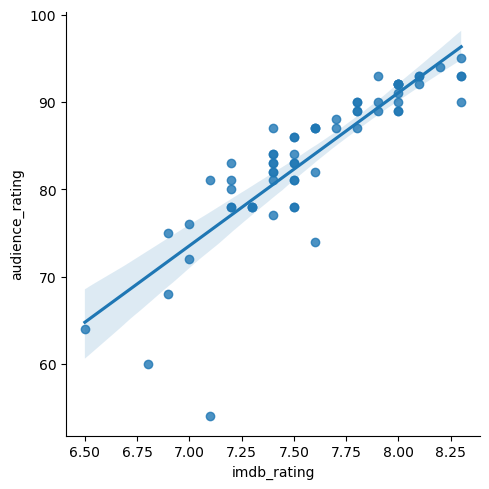

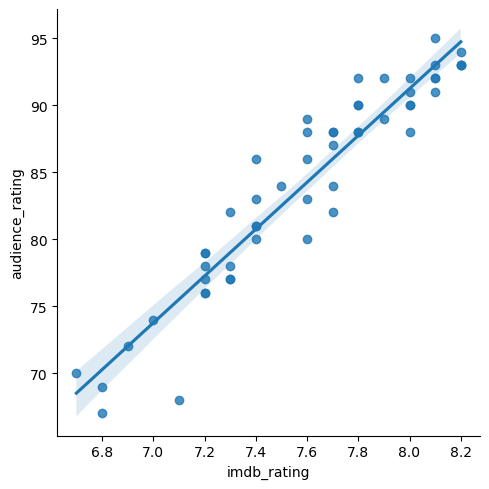

In [25]:
sns.lmplot(filtered_df[filtered_df["content_rating"] == "G"], x="imdb_rating", y="audience_rating")
sns.lmplot(filtered_df[filtered_df["content_rating"] == "PG-13"], x="imdb_rating", y="audience_rating")
sns.lmplot(filtered_df[filtered_df["content_rating"] == "PG"], x="imdb_rating", y="audience_rating")
sns.lmplot(filtered_df[filtered_df["content_rating"] == "R"], x="imdb_rating", y="audience_rating")

По графику выше можно сделать вывод, что оценки IMDB и Audience сильно связаны.

#### Сравнение категорий рейтинга

<Axes: title={'center': 'audience_rating'}, xlabel='content_rating'>

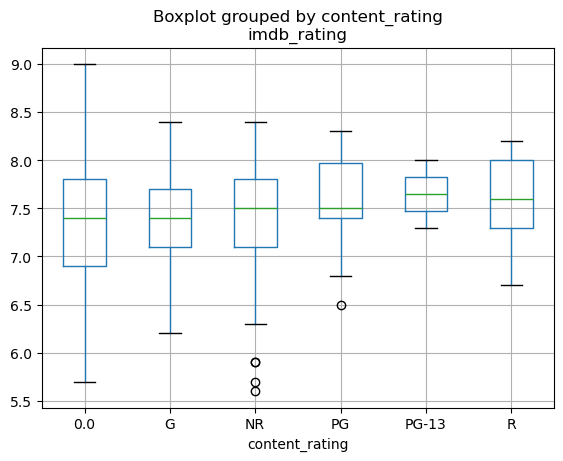

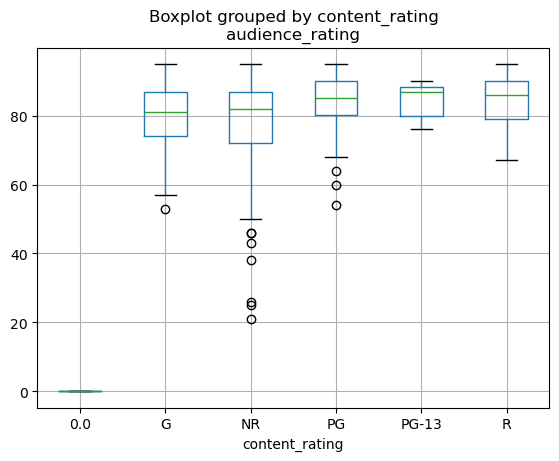

In [26]:
filtered_df.boxplot(by="content_rating", column="imdb_rating", grid=True)
filtered_df.boxplot(by="content_rating", column="audience_rating", grid=True)

На графиках выше видно, что категории PG, PG-13 и R оценки вцелом выше чем у остальных категорий и между собой почти равны, но у R количество более низких оценок больше чем PG.